In [1]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Concatenate, Dropout, Conv2DTranspose
import os
from keras.preprocessing.image import load_img, ImageDataGenerator

Using TensorFlow backend.


In [2]:
def load_data(path, height, width):
    arr=np.empty([1,height,width,1])
    for img in os.listdir(path):
        temp=np.asarray(load_img(os.path.join(path, img), color_mode='grayscale')).reshape((360,480,1))
        arr=np.append(arr, temp[None,:,:,:], axis=0)
    arr=np.delete(arr, [0], axis=0)
    return arr        

In [3]:
def get_unet(input_image, n_filter = 8, dropout = 0.1, kernel_size=3):
    # Contracting Path
    #c1 = conv2d_block(n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    c1 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(input_image)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    c1 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(c1)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    p1 = MaxPooling2D(strides=2)(c1)
    p1 = Dropout(dropout)(p1)
    
    
    #c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    c2 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    c2 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(c2)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    p2 = MaxPooling2D(strides=2)(c2)
    p2 = Dropout(dropout)(p2)
    
    
    #c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    c3 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    c3 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(c3)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    p3 = MaxPooling2D(strides=2)(c3)
    p3 = Dropout(dropout)(p3)
    
    
    ''' #c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    c4 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    
    c4 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(c4)
    c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    
    p4 = MaxPooling2D(pool_size=3, strides=3)(c4)
    p4 = Dropout(dropout)(p4)
    '''
    
    #code section of autoencoder
    #c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    c5 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(p3)#if uncommented, give p4
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    c5 = Conv2D(n_filter*16, (kernel_size,kernel_size), padding='same')(c5)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    '''
    # Expansive Path
    ## doubt: why is the stride (2,2) and (1,1)
    u6 = Conv2DTranspose(n_filter * 8, (3, 3), strides = (3, 3), padding = 'same')(c5)
    u6 = Concatenate()([u6, c4])
    u6 = Dropout(dropout)(u6)
    ##c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    c6 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    
    c6 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(c6)
    c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    '''
    
    u7 = Conv2DTranspose(n_filter * 4, (3, 3), strides = (2, 2), padding = 'same')(c5)#if uncommented, give c6
    u7 = Concatenate()([u7, c3])
    u7 = Dropout(dropout)(u7)
    ##c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    c7 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    c7 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(c7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    
    u8 = Conv2DTranspose(n_filter * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = Concatenate()([u8, c2])
    u8 = Dropout(dropout)(u8)
    ##c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    c8 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
    c8 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(c8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
    
    u9 = Conv2DTranspose(n_filter * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = Concatenate()([u9, c1])
    u9 = Dropout(dropout)(u9)
    ##c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    c9 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    c9 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(c9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    
    # basically we want a sigmoid activation layer with depth of 1
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[input_image], outputs=[outputs])
    return model

In [4]:
input_image=Input((None,None,1))
model=get_unet(input_image=input_image)

In [5]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
train=load_data('C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_data\\images_prepped_train', 360, 480)

In [17]:
test_annot=load_data('C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\val_annot\\annotations_prepped_test', 360, 480)

In [7]:
test=load_data('C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\val_data\\images_prepped_test', 360, 480)

In [8]:
def data_gen(images, masks):
    color_mode='grayscale'
    data_gen_args = dict(rotation_range=90.,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.2,
                         rescale=1./255) 
    image_datagen = ImageDataGenerator(**data_gen_args) 
    #mask_datagen = ImageDataGenerator(**data_gen_args)
    val_datagen = ImageDataGenerator(rescale=1./255)
    seed=1
    # Provide the same seed and keyword arguments to the fit and flow methods seed = 1 
    image_datagen.fit(images, augment=True, seed=seed) 
    val_datagen.fit(masks, augment=True, seed=seed)

    image_generator = image_datagen.flow_from_directory(
        'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_data',
        target_size=(360,480),
        batch_size=36,
        shuffle=False,
        color_mode=color_mode,
        class_mode=None,
        seed=seed)

    mask_generator = image_datagen.flow_from_directory(
        'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_annot',
        target_size=(360,480),
        batch_size=36,
        shuffle=False,
        color_mode=color_mode,
        class_mode=None,
        seed=seed)
    val_mask_gen = val_datagen.flow_from_directory(
        'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\val_annot',
        target_size=(360,480),
        batch_size=10,
        shuffle=False,
        color_mode=color_mode,
        class_mode=None,
        seed=seed)
    val_data_gen = val_datagen.flow_from_directory(
        'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\val_data',
        target_size=(360,480),
        batch_size=10,
        shuffle=False,
        color_mode=color_mode,
        class_mode=None,
        seed=seed)


    # combine generators into one which yields image and masks 
    train_generator = zip(image_generator, mask_generator)
    test_generator = zip(val_data_gen, val_mask_gen)
    return (train_generator, test_generator)

In [9]:
train_generator, test_generator=data_gen(train, test)
history=model.fit_generator(generator=train_generator, epochs=20, verbose=1, validation_data=test_generator, validation_steps=20, steps_per_epoch=20)

Found 360 images belonging to 1 classes.
Found 360 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Epoch 1/20
20/20 [==============================] - 1818s 91s/step - loss: 0.4513 - acc: 0.1912 - val_loss: 0.3767 - val_acc: 0.0908
Epoch 2/20
20/20 [==============================] - 1648s 82s/step - loss: 0.3394 - acc: 0.1958 - val_loss: 0.2277 - val_acc: 0.0918
Epoch 3/20
20/20 [==============================] - 1580s 79s/step - loss: 0.2754 - acc: 0.1991 - val_loss: 0.1526 - val_acc: 0.0918
Epoch 4/20
20/20 [==============================] - 1714s 86s/step - loss: 0.2388 - acc: 0.1995 - val_loss: 0.2850 - val_acc: 0.0918
Epoch 5/20
20/20 [==============================] - 1621s 81s/step - loss: 0.2125 - acc: 0.1949 - val_loss: 0.1612 - val_acc: 0.0918
Epoch 6/20
20/20 [==============================] - 1645s 82s/step - loss: 0.1921 - acc: 0.1935 - val_loss: 0.1743 - val_acc: 0.0918
Epoch 7/20
20/20 [====================

In [10]:
model.save('unet_model3')

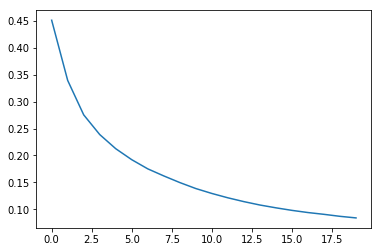

In [12]:
plt.plot(history.history['loss'])

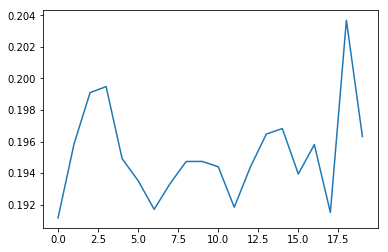

In [13]:
plt.plot(history.history['acc'])

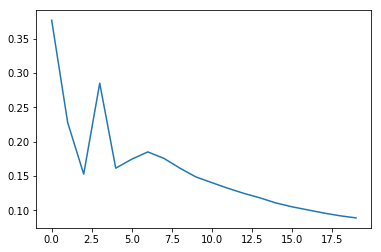

In [14]:
plt.plot(history.history['val_loss'])

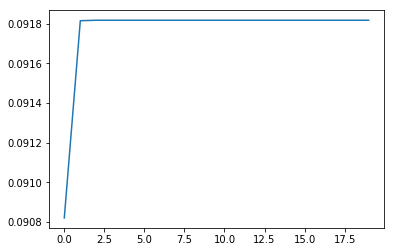

In [15]:
plt.plot(history.history['val_acc'])

(4, 360, 480, 1)
4/4 [==============================] - 1s 322ms/step


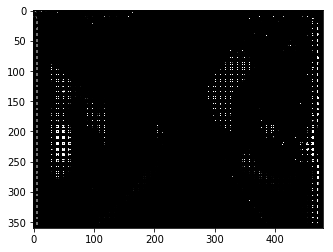

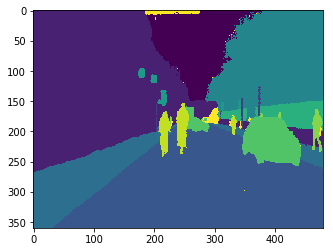

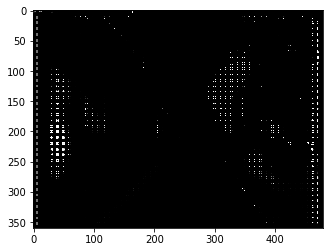

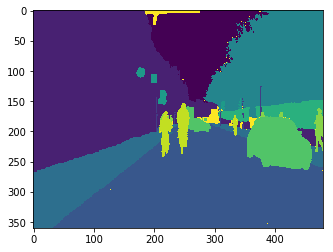

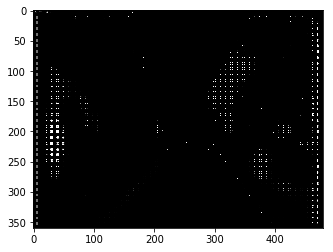

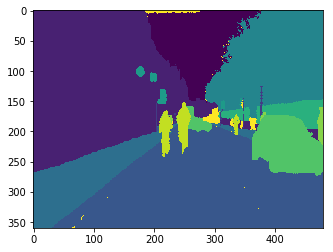

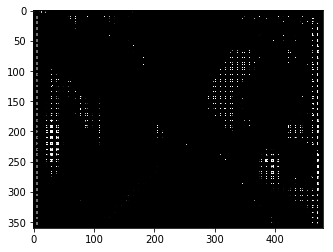

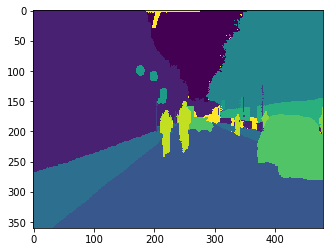

In [20]:
x=test[1:5,:,:,:]
print(x.shape)
pred=model.predict(x, verbose=1)
for i in range(4):
    height,width,channel=pred[i,:,:,:].shape
    plt.imshow(pred[i,:,:,:].reshape(height,width), cmap='gray')
    plt.show()
    plt.imshow(test_annot[i,:,:,:].reshape(height,width))
    plt.show()